In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

img_=cv2.imread("./sasuke.jpeg")

In [15]:
img_=cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)

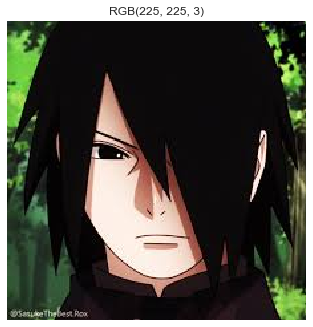

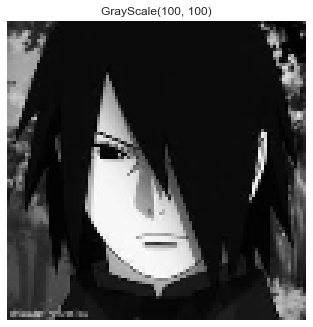

In [17]:
img=cv2.resize(img_,(100,100))
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img_,"RGB")
drawImg(img_gray,"GrayScale")

In [21]:
#Hardcoded filter




def convolution(img,img_filter):
    w=img.shape[0]
    h=img.shape[1]
    
    F=img_filter.shape[0] 
    new_img=np.zeros((w-F+1,h-F+1))
    
    for row in range(w-F+1):
        for col in range(h-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col]+=img[row+i][col+j]*img_filter[i][j] #multiplication matrix
                
                if new_img[row][col]>255:
                    new_img[row][col]=255
                
                elif new_img[row][col]<0:
                    new_img[row][col]=0
                    
    return new_img #activation map
    
    
    

In [22]:
#the outer two loops are iterating over new imgage
#and inner two loops are iterating over filters

In [26]:
blur_filter=np.ones((3,3))/9.0 #randomly

output1=convolution(img_gray,blur_filter) #average of all values

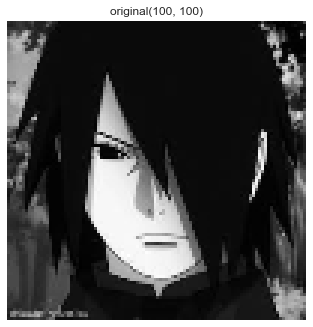

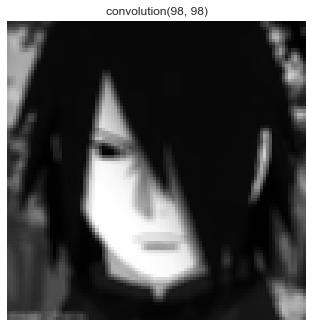

In [27]:
drawImg(img_gray,"original")
drawImg(output1,"convolution")

In [29]:
edge_filter=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

output2=convolution(img_gray,edge_filter) #average of all values

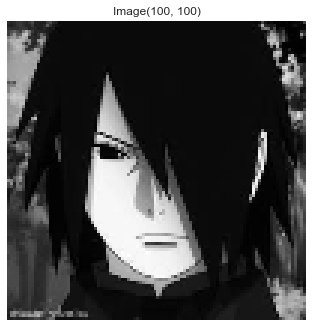

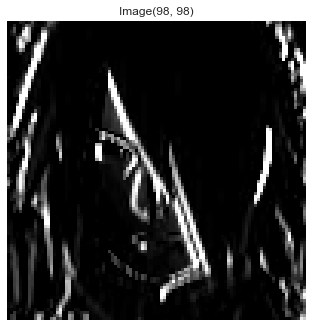

In [32]:
drawImg(img_gray)
drawImg(output2) #we could see the edges a little bit,by highlighting the edges

In [33]:
##extracting features of image using features

In [34]:
#Convolutional Layer
#contains various filters
#each filter extracts different kinds of features and gives 1 activstion map
#multiple activation maps are combined by stacking to form output volume
#so CNN layer takes input a voulume and produces an output volume of different shape

In [35]:
##Pooling

In [43]:
X=np.array([[1,0,2,3],
          [4,6,6,8],
            [3,1,1,0],
           [1,2,2,4]])

def pooling(X,mode="max"):
    stride=2
    f=2
    
    h,w=X.shape
    
    ho=int((h-f)/stride)+1
    wo=int((w-f)/stride)+1
    
    output=np.zeros((ho,wo))
    
    for r in range(ho):
        for c in range(wo):
            r_start=r*stride
            r_end=r_start+f
            c_start=c*stride
            c_end=c_start+f
            
            x_slice=X[r_start:r_end,c_start:c_end]
            if(mode=="max"):
                output[r][c]=np.max(x_slice)
            else:
                output[r][c]=np.mean(x_slice)
                
    return output

In [44]:
pooling_output=pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
